In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./hurto.csv", sep = ';')

In [3]:
df_copy = df.copy()

In [4]:
df_2017_2022 = df_copy[df_copy["Fecha_hecho"] >= 2017].reset_index()

In [5]:
df_2017_2022

,index,Fecha_hecho,Conducta,Codigo_comuna,Cantidad_casos
0,205,2017,Extorsión,1,6
1,206,2017,Extorsión,10,77
2,207,2017,Extorsión,11,41
3,208,2017,Extorsión,12,24
4,209,2017,Extorsión,13,35
...,...,...,...,...,...
776,2436,2021,Hurto de semoviente,60,2
777,2437,2021,Hurto de semoviente,80,2
778,2438,2022,Hurto de semoviente,50,1
779,2439,2022,Hurto de semoviente,60,1


In [6]:
df_2017_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           781 non-null    int64 
 1   Fecha_hecho     781 non-null    int64 
 2   Conducta        781 non-null    object
 3   Codigo_comuna   781 non-null    object
 4   Cantidad_casos  781 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 30.6+ KB


In [7]:
df_2017_2022.convert_dtypes().dtypes

index                      Int64
Fecha_hecho                Int64
Conducta          string[python]
Codigo_comuna     string[python]
Cantidad_casos             Int64
dtype: object

In [8]:
df_2017_2022.isnull().any()

index             False
Fecha_hecho       False
Conducta          False
Codigo_comuna     False
Cantidad_casos    False
dtype: bool

In [9]:
df_2017_2022 = df_2017_2022[df_2017_2022['Codigo_comuna'] != 'SIN DATO']

In [10]:
df_2017_2022.loc[:,["Codigo_comuna"]] = df_2017_2022["Codigo_comuna"].astype('float')

In [11]:
df_2017_2022.drop("index", axis = 1).to_csv("Datos_hurtos_2017_2022.csv")

## Grafico de barras (Cantidad de Conductas por año en las comunas)

In [124]:
aray_conductas = pd.unique(df_2017_2022["Conducta"])

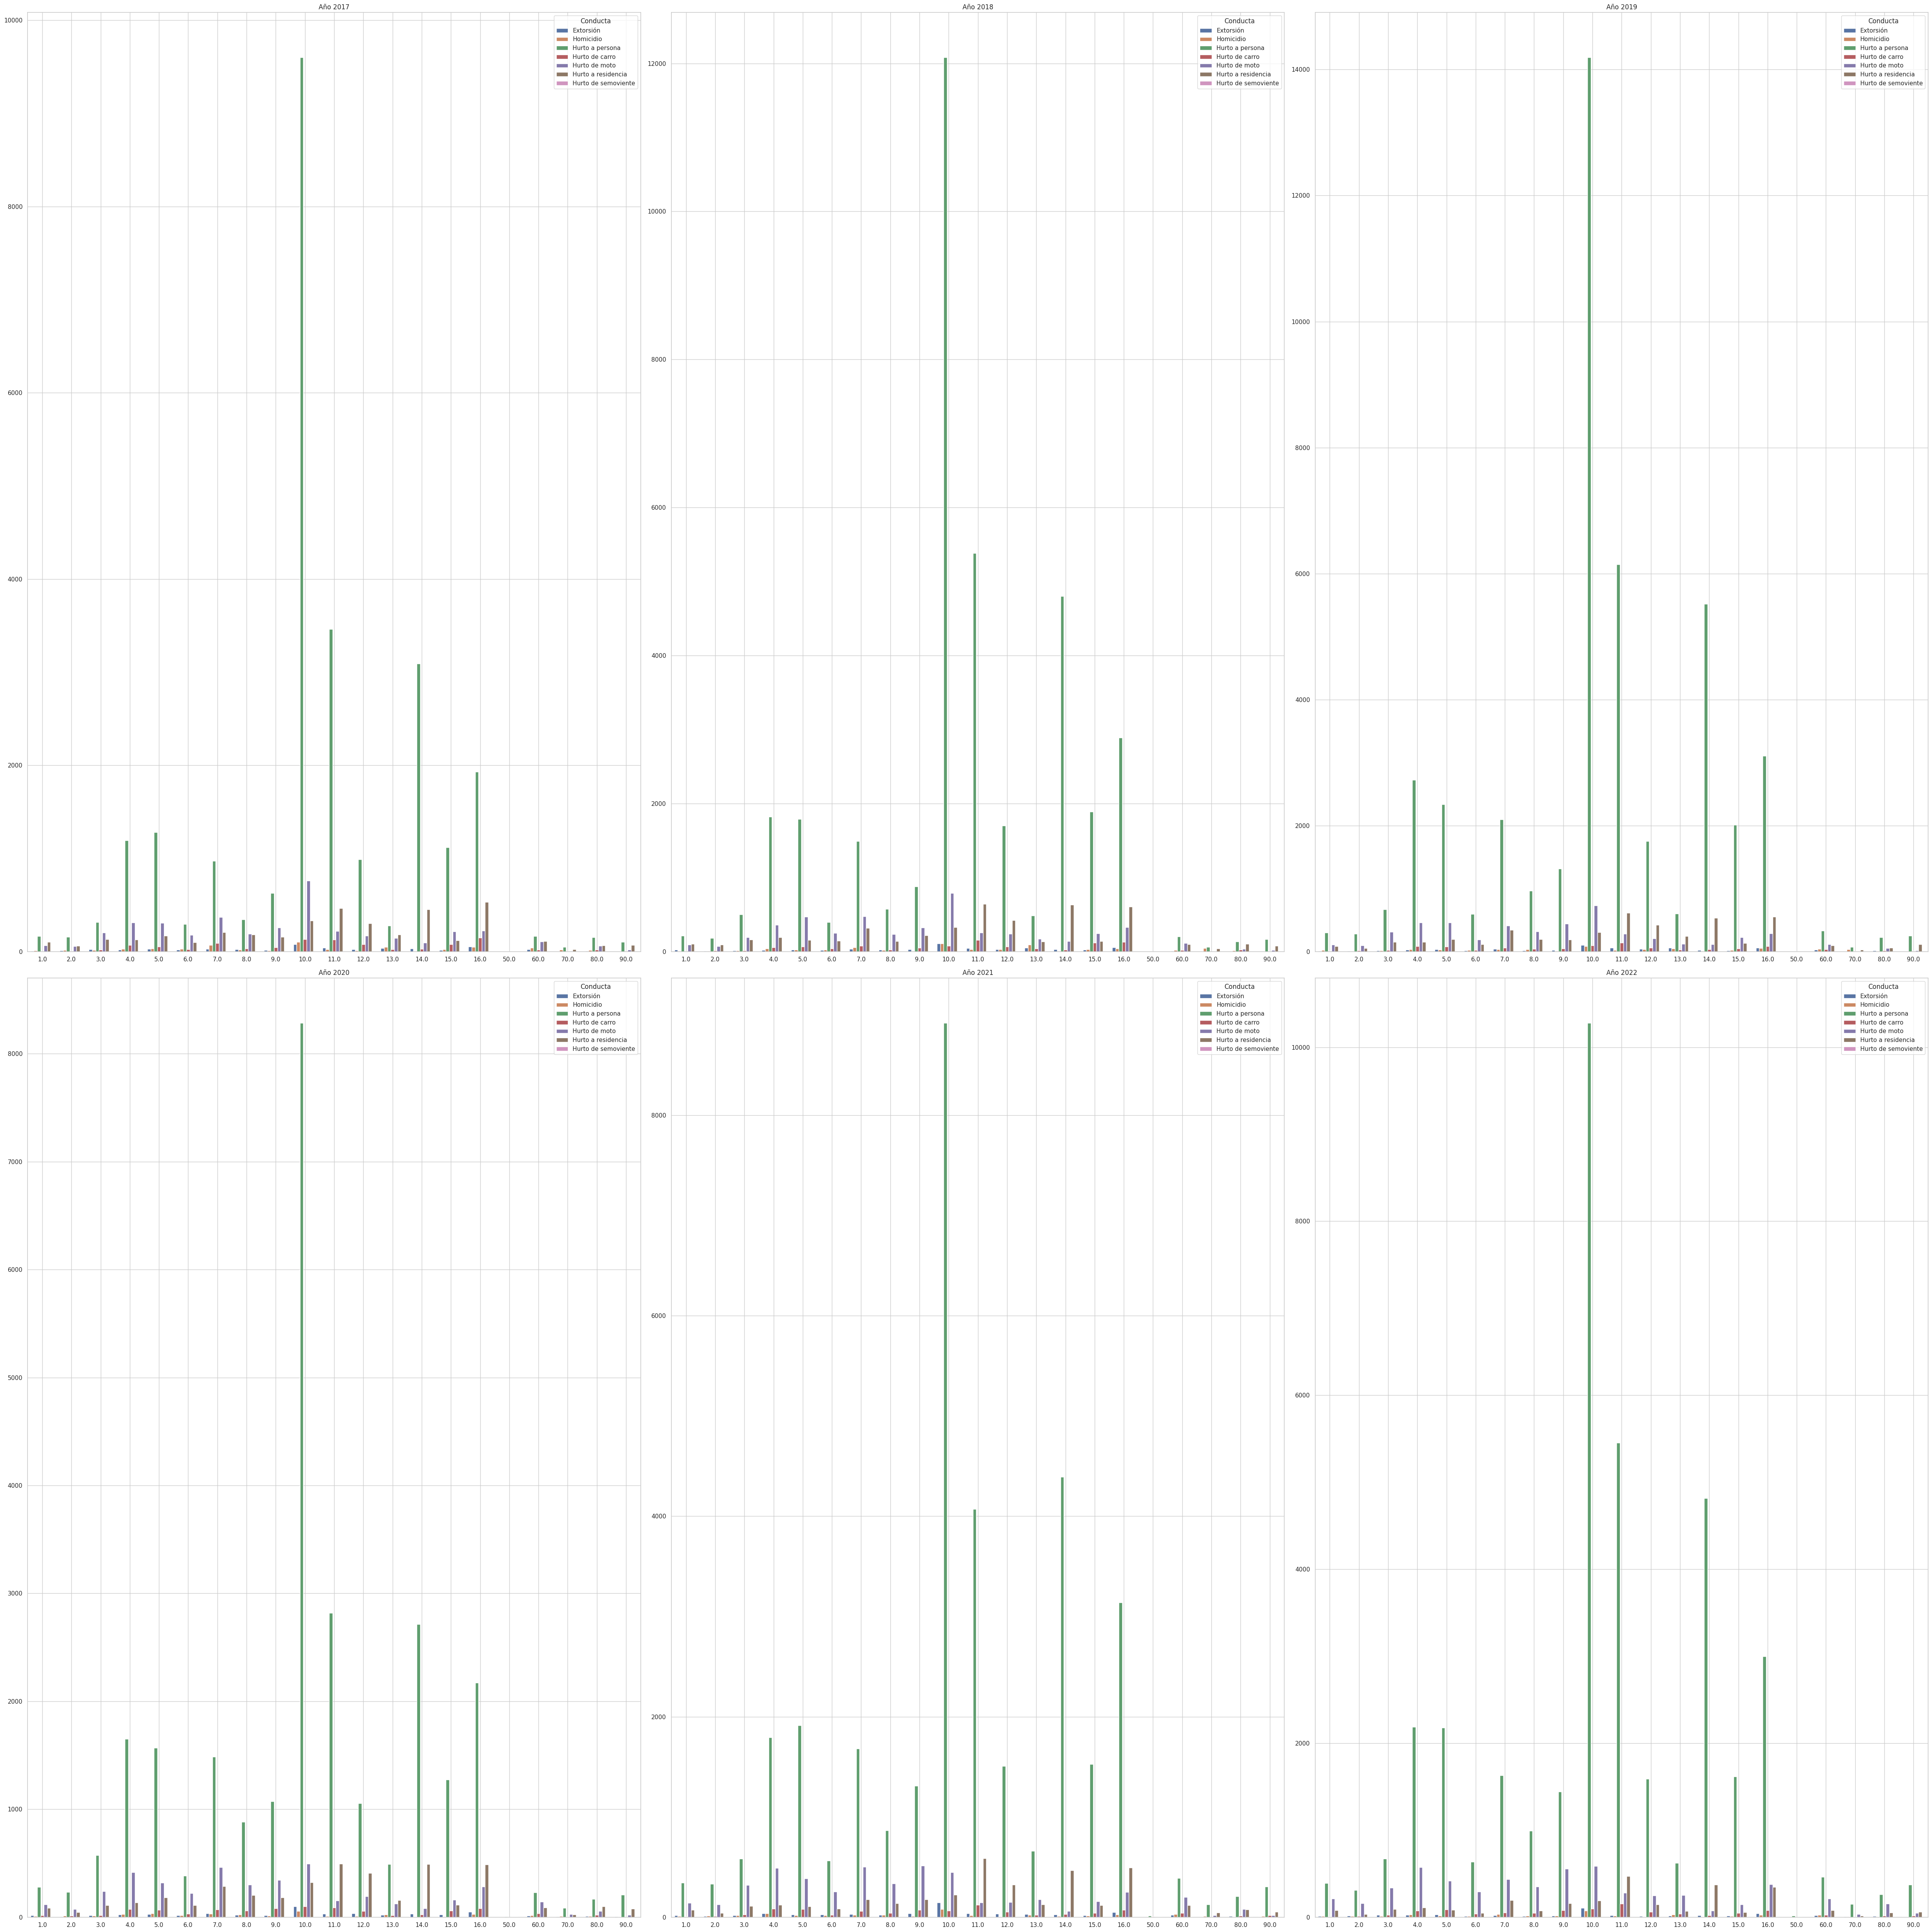

In [129]:
plt.figure(figsize = (50,50))


for n,i in enumerate(pd.unique(df_2017_2022['Fecha_hecho'])):
    plt.subplot(2,3, n + 1)
    data = df_2017_2022[(df_2017_2022.Fecha_hecho == i) & (df_2017_2022.Conducta.isin(aray_conductas))]
    sns.barplot(data = data, x = 'Codigo_comuna', y = 'Cantidad_casos' ,hue = 'Conducta')
    plt.title(f"Año {i}")
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(axis = "x")
    #plt.xticks(rotation=90)
    plt.tight_layout()
plt.savefig('Gráficos de Barras para Conductas (2017-2022).jpg', dpi = 300, transparent=True)
plt.show()

## Grafico de barras (Cambio de cantidad de conductas por años en las comunas)

In [12]:
aray_Fecha_hecho = pd.unique(df_2017_2022["Fecha_hecho"])

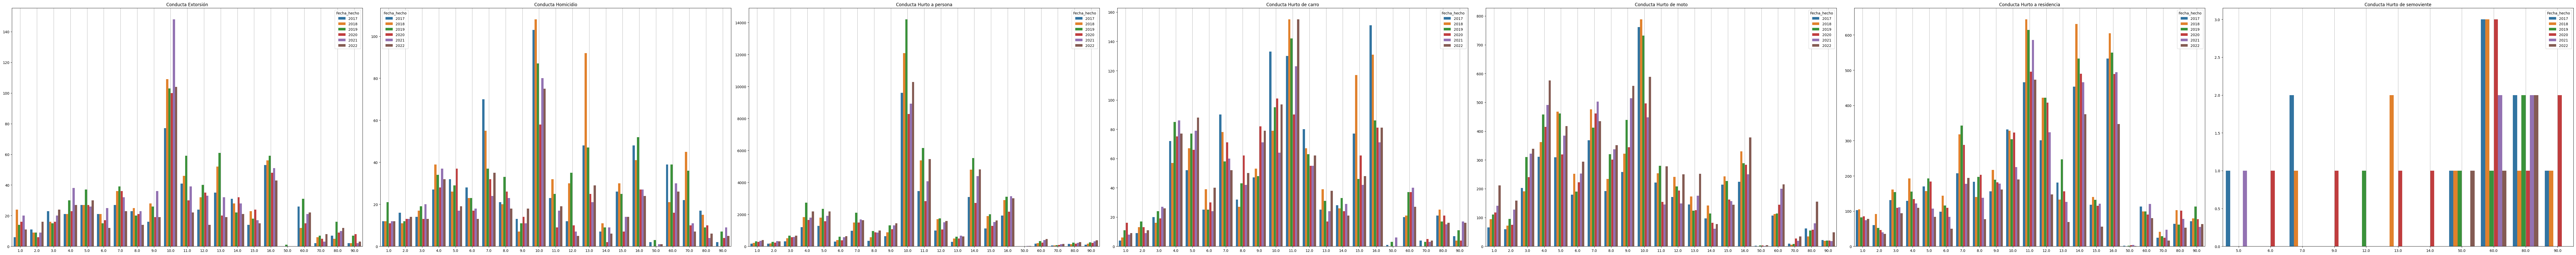

In [28]:
plt.figure(figsize = (100,10))


for n,i in enumerate(pd.unique(df_2017_2022['Conducta'])):
    plt.subplot(1,7, n + 1)
    data = df_2017_2022[(df_2017_2022.Conducta == i) & (df_2017_2022.Fecha_hecho.isin(aray_Fecha_hecho))]
    sns.barplot(data = data, x = 'Codigo_comuna', y = 'Cantidad_casos' ,hue = 'Fecha_hecho')
    plt.title(f"Conducta {i}")
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(axis = "x")
    #plt.xticks(rotation=90)
    plt.tight_layout()
plt.savefig('Gráficos de Barras para Conductas (2017-2022).jpg', dpi = 300, transparent=True)
plt.show()

In [15]:
df_ingresos_familias = pd.read_csv("./17_20_ingresos_familias.csv")

In [16]:
df_ingresos_familias.head()

,Unnamed: 0,Comuna,Codigo_comuna,annio,0-500000,500001-1000000,1000001-1500000,1500001-2000000,2000001-2500000,2500001-3000000,3000001-3500000,3500001-4000000,4000001-4500000,4500001-5000000,Mayor o igual a 5000001
0,0,ALTAVISTA,70.0,2017,160,133,41,8,4,0,0,0,0,0,0
1,1,ALTAVISTA,70.0,2018,209,172,20,38,6,1,1,0,0,0,0
2,2,ALTAVISTA,70.0,2019,332,216,31,35,8,3,3,1,0,0,1
3,3,ARANJUEZ,4.0,2017,690,710,204,91,42,16,6,6,4,0,4
4,4,ARANJUEZ,4.0,2018,941,846,203,175,55,24,19,6,3,0,3


In [17]:
result = pd.merge(df_ingresos_familias, df_2017_2022, right_on = "Codigo_comuna", left_on = "Codigo_comuna", how = "outer") 
result.head()

,Unnamed: 0,Comuna,Codigo_comuna,annio,0-500000,500001-1000000,1000001-1500000,1500001-2000000,2000001-2500000,2500001-3000000,3000001-3500000,3500001-4000000,4000001-4500000,4500001-5000000,Mayor o igual a 5000001,index,Fecha_hecho,Conducta,Cantidad_casos
0,0,ALTAVISTA,70.0,2017,160,133,41,8,4,0,0,0,0,0,0,220,2017,Extorsión,2
1,0,ALTAVISTA,70.0,2017,160,133,41,8,4,0,0,0,0,0,0,240,2018,Extorsión,6
2,0,ALTAVISTA,70.0,2017,160,133,41,8,4,0,0,0,0,0,0,261,2019,Extorsión,7
3,0,ALTAVISTA,70.0,2017,160,133,41,8,4,0,0,0,0,0,0,281,2020,Extorsión,5
4,0,ALTAVISTA,70.0,2017,160,133,41,8,4,0,0,0,0,0,0,301,2021,Extorsión,3


<Figure size 2000x2000 with 0 Axes>

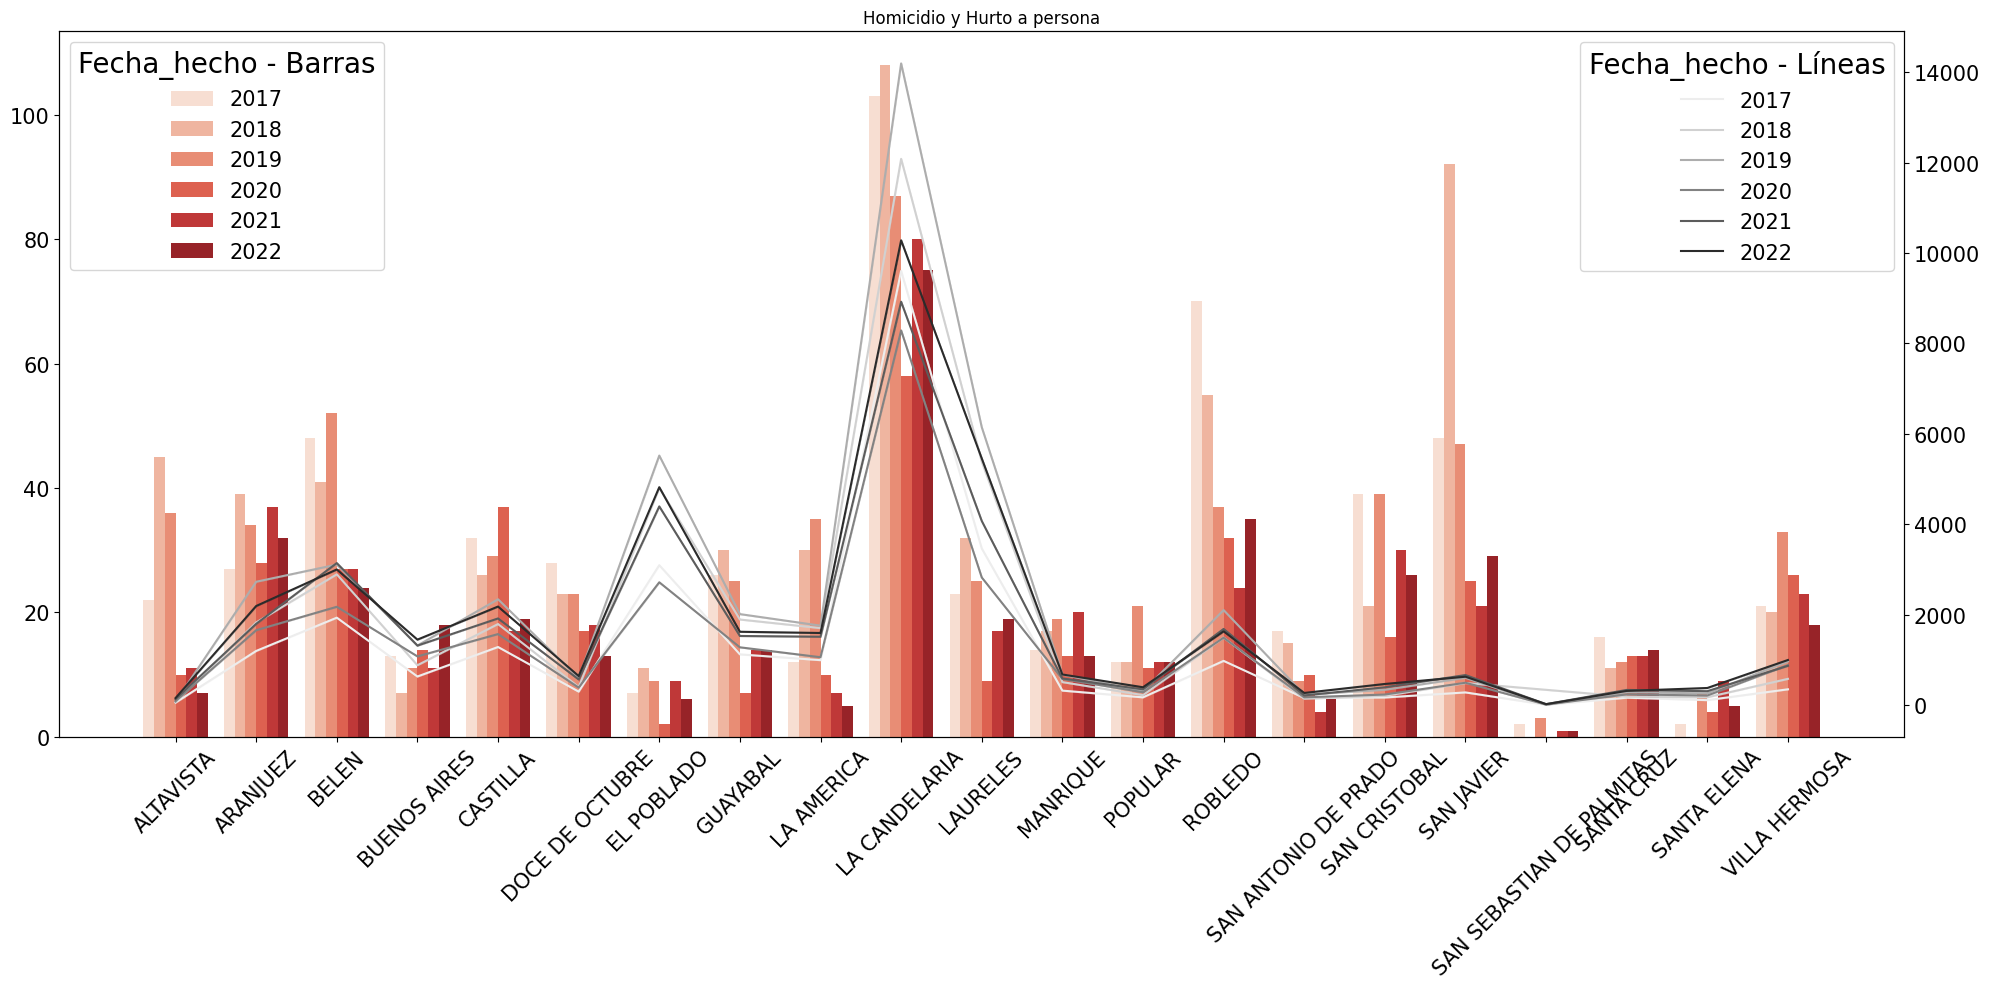

In [18]:
# Define una paleta de colores de tonos de rojo para las barras
palette_barras = sns.color_palette("Reds", len(result['Fecha_hecho'].unique()))

# Define una paleta de colores de tonos de grises para las líneas
palette_lineas = sns.color_palette("Greys", len(result['Fecha_hecho'].unique()))


plt.figure(figsize=(20, 20))

data1 = result[(result.Conducta == "Homicidio") & (result.Fecha_hecho.isin(aray_Fecha_hecho))]
data2 = result[(result.Conducta == "Hurto a persona") & (result.Fecha_hecho.isin(aray_Fecha_hecho))]

# Crea un segundo eje (gráfico de líneas en tonos de grises) compartiendo el eje y del primer eje (gráfico de barras)
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()

# Configura el primer eje (gráfico de barras en tonos de rojo)
sns.barplot(data=data1, x='Comuna', y='Cantidad_casos', hue='Fecha_hecho', palette=palette_barras, ax=ax1)

# Configura el segundo eje (gráfico de líneas en tonos de grises)
sns.lineplot(data=data2, x='Comuna', y='Cantidad_casos', hue='Fecha_hecho', palette=palette_lineas, ax=ax2)

plt.title(f"Homicidio y Hurto a persona")
ax1.set_xlabel('')
ax1.set_ylabel('')
ax2.set_ylabel('')

# Rotamos las etiquetas del eje x en 45 grados
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.tick_params(axis='both', labelsize=15)
ax2.tick_params(axis='y', labelsize=15)

# Ajusta el tamaño del legend y la ubicación
legend1 = ax1.legend(title='Fecha_hecho - Barras', prop={'size': 15})
legend1.get_title().set_fontsize(20)  # Ajusta el tamaño del título del legend
#legend1.set_loc('upper left')  # Ubicación del legend para las barras

legend2 = ax2.legend(title='Fecha_hecho - Líneas', prop={'size': 15})
legend2.get_title().set_fontsize(20)  # Ajusta el tamaño del título del legend
#legend2.set_loc('upper right')  # Ubicación del legend para las líneas

plt.tight_layout()
plt.savefig('Gráficos de Barras y Líneas para Conductas (2017-2022) - Rojo y Gris - Rotado.jpg', dpi=300, transparent=True)
plt.show()

In [101]:
df_2017_2022[df_2017_2022['Codigo_comuna'] == 10.0]

,index,Fecha_hecho,Conducta,Codigo_comuna,Cantidad_casos
1,206,2017,Extorsión,10.0,77
21,226,2018,Extorsión,10.0,109
41,246,2019,Extorsión,10.0,103
62,267,2020,Extorsión,10.0,100
82,287,2021,Extorsión,10.0,148
102,307,2022,Extorsión,10.0,104
130,619,2017,Homicidio,10.0,103
151,640,2018,Homicidio,10.0,108
170,659,2019,Homicidio,10.0,87
191,680,2020,Homicidio,10.0,58
